## This notebook contains calculations for the TDI challenge first part

In [404]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras # for machine learning models
import scipy # linear models..etc

#Taking both time inputs as strings and returning float
import datetime
#We import the required libraries for data exploration and visualization.
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

print(os.listdir("."))

['Incidents_Responded_to_by_Fire_Companies.csv', 'OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls', 'challenge_page.html', 'TDI_Project_Section_I.ipynb', '2010+Census+Population+By+Zipcode+(ZCTA).csv', '.ipynb_checkpoints']


In [4]:
PATH_TO_META_SAMPLES = 'Incidents_Responded_to_by_Fire_Companies.csv'
data_df = pd.read_csv(PATH_TO_META_SAMPLES)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_df.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,10454,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55672692,818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,10036,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,11418,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,11103,5 - Queens,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,11385,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploring the different types of incidents

Text(0,0.5,'Count')

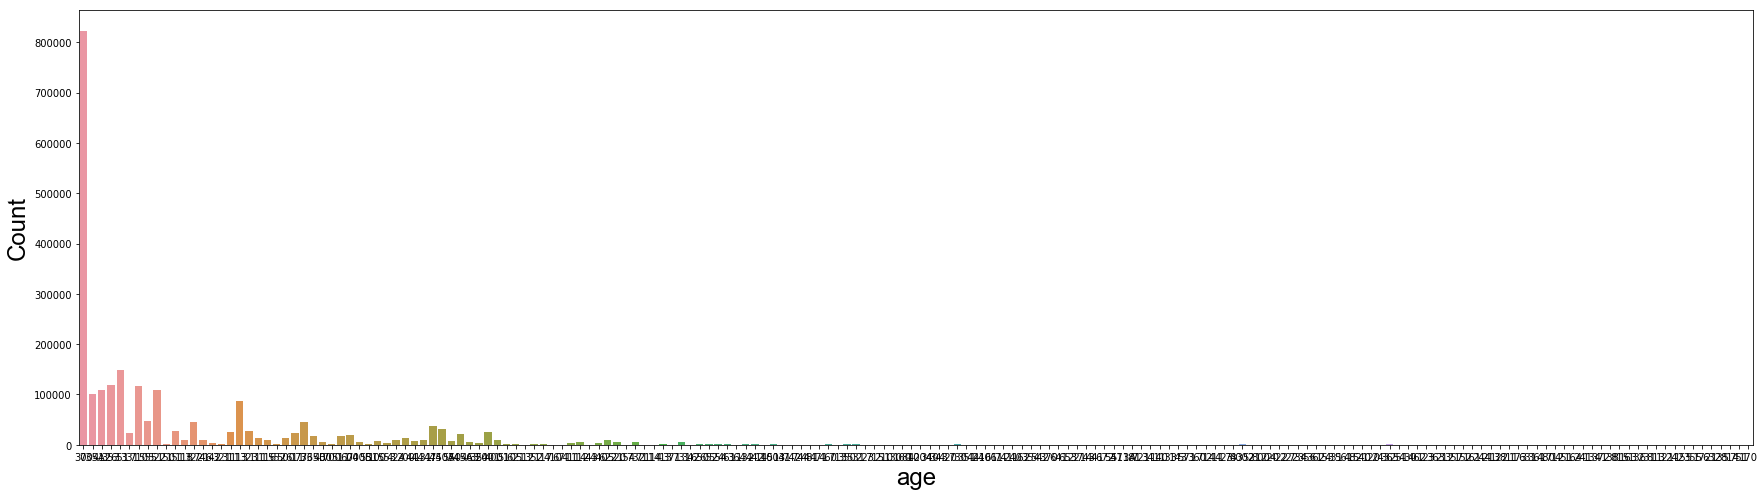

In [17]:
ax = plt.figure(figsize=(30, 8))
sns.countplot(data_df.INCIDENT_TYPE_KEY)
axis_font = {'fontname':'Arial', 'size':'24'}
plt.xlabel('age',  **axis_font)
plt.ylabel('Count',  **axis_font)

In [11]:
test = ["300 - Rescue, EMS incident, other", "735A - Unwarranted alarm/defective condition o..."]
for t in test :
    print(t.split("-")[0].strip())

300
735A


In [13]:
data_df['INCIDENT_TYPE_KEY'] = [t.split("-")[0].strip() for t in data_df['INCIDENT_TYPE_DESC']]

In [28]:
len(data_df.INCIDENT_TYPE_KEY.unique())

182

In [29]:
Code_Frequencies = data_df.INCIDENT_TYPE_KEY.value_counts()

In [46]:
print("The leading special code is {0} with frequency {1}".format(Code_Frequencies.idxmax(), Code_Frequencies[Code_Frequencies.idxmax]))

The leading special code is 300 with frequency 823378


#### Printing results for section I

#### Question 1 exploration

In [50]:
#Question (i)
res = Code_Frequencies['300']/sum(Code_Frequencies.values)
format(res, '.10f')

'0.3614828304'

In [52]:
#Non cleaned result would be
temp_arr = data_df.INCIDENT_TYPE_DESC.value_counts()
res2 = temp_arr[temp_arr.idxmax]/sum(temp_arr.values)
format(res2, '.10f')

'0.3614828304'

#### Question 2 exploration

In [65]:
#Question (ii)
data_111 = data_df.loc[data_df['INCIDENT_TYPE_KEY'] == '111']
data_651 = data_df.loc[data_df['INCIDENT_TYPE_KEY'] == '651']

In [61]:
res = data_111['UNITS_ONSCENE'].mean()/data_651['UNITS_ONSCENE'].mean()
format(res, '.10f')

'2.7597595140'

In [64]:
data_111['UNITS_ONSCENE'].mean()

11.084639740520503

In [66]:
data_df.BOROUGH_DESC.unique()

array(['2 - Bronx', '1 - Manhattan', '5 - Queens', '4 - Brooklyn',
       '3 - Staten Island'], dtype=object)

#### Question 3 exploration

In [74]:
#Question (iii)
data_Manhattan = data_df.loc[data_df['BOROUGH_DESC'] == '1 - Manhattan']
data_Staten = data_df.loc[data_df['BOROUGH_DESC'] == '3 - Staten Island']

In [79]:
Manhattan_code_Frequencies = data_Manhattan.INCIDENT_TYPE_KEY.value_counts()
Manhattan_Mischievious_calls_rate = Manhattan_code_Frequencies['710']/sum(Manhattan_code_Frequencies.values)
Staten_code_Frequencies = data_Staten.INCIDENT_TYPE_KEY.value_counts()
Staten_Mischievious_calls_rate = Staten_code_Frequencies['710']/sum(Staten_code_Frequencies.values)
res = Staten_Mischievious_calls_rate/Manhattan_Mischievious_calls_rate
format(res, '.10f')

'1.6243819472'

#### Question 4 exploration

In [80]:
data_111.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,INCIDENT_TYPE_KEY
90,55672965,2595,111 - Building fire,01/01/2013 12:58:10 AM,01/01/2013 01:00:50 AM,15.0,01/01/2013 04:15:20 AM,7 - Signal 7-5,11830.0,11 - Extinguishment by fire service personnel,...,4 - Brooklyn,NaN,NaN,NaN,1.0,5 - Beyond building of origin,N - None present,N - None Present,0.0,111
198,55673299,2591,111 - Building fire,01/01/2013 02:22:56 AM,01/01/2013 02:25:23 AM,9.0,01/01/2013 07:29:44 AM,7 - Signal 7-5,18408.0,11 - Extinguishment by fire service personnel,...,2 - Bronx,4,NaN,NaN,4.0,3 - Confined to floor of origin,N - None present,N - None Present,0.0,111
439,55673870,1601,111 - Building fire,01/01/2013 06:20:49 AM,01/01/2013 06:26:13 AM,23.0,01/01/2013 10:32:28 AM,2 - 2nd alarm,15099.0,11 - Extinguishment by fire service personnel,...,1 - Manhattan,6,NaN,NaN,6.0,4 - Confined to building of origin,N - None present,N - None Present,0.0,111
491,55674012,7973,111 - Building fire,01/01/2013 07:59:48 AM,01/01/2013 08:03:33 AM,6.0,01/01/2013 08:19:37 AM,"1 - More than initial alarm, less than Signal 7-5",1189.0,11 - Extinguishment by fire service personnel,...,5 - Queens,3rd,NaN,NaN,3.0,1 - Confined to object of origin,N - None present,N - None Present,0.0,111
568,55674170,1726,111 - Building fire,01/01/2013 09:47:27 AM,01/01/2013 09:49:25 AM,13.0,01/01/2013 11:11:42 AM,7 - Signal 7-5,5055.0,11 - Extinguishment by fire service personnel,...,4 - Brooklyn,NaN,NaN,NaN,5.0,2 - Confined to room of origin,N - None present,N - None Present,0.0,111


In [93]:
for x in data_111.INCIDENT_DATE_TIME[0:1] :
    for y in x.split() :
        print(y)

01/01/2013
12:58:10
AM


In [231]:
for x in data_111.INCIDENT_DATE_TIME[0:1]:
    arr = x.split()
    str1 = x
for y in data_111.ARRIVAL_DATE_TIME[0:1]:
    arr = y.split()
    str2 = y
print(arr)
print(type(str1))
print(str1)

['01/01/2013', '01:00:50', 'AM']
<class 'str'>
01/01/2013 12:58:10 AM


In [229]:
import datetime
format = '%m/%d/%Y %I:%M:%S %p'
startDateTime = datetime.datetime.strptime(str1, format)
endDateTime = datetime.datetime.strptime(str2, format)

In [149]:
def calcTimeDiff(arrivalTime, endTime):
    format = '%m/%d/%Y %I:%M:%S %p'
    startDateTime = datetime.datetime.strptime(arrivalTime, format)
    endDateTime = datetime.datetime.strptime(endTime, format)
    diff = endDateTime - startDateTime
    return diff.total_seconds()/60

In [177]:
temp

4.166666666666667

In [182]:
calcTimeDiff(str1, str2)

2.6666666666666665

In [183]:
c_ls = list(zip(data_111['INCIDENT_DATE_TIME'], data_111['ARRIVAL_DATE_TIME']))

In [184]:
print(len(data_111['INCIDENT_DATE_TIME']), len(data_111['ARRIVAL_DATE_TIME']))

13089 13089


In [185]:
len(c_ls)

13089

In [216]:
#We have 20 places where the code would not make sense, aka reciving a NaN value
time_diff = []
index = 0
for x in c_ls:
    if ((not isinstance(x[0], str)) or (not isinstance(x[1], str))):
        temp = 0
    else:
        temp = calcTimeDiff(x[0],x[1])
    time_diff.append(temp)
    index += 1
print(index)
print(len(data_111['INCIDENT_DATE_TIME']))

13089
13089


In [223]:
# Result to question (iv)
np.percentile(time_diff, 75)

4.15

In [217]:
data_111['TIME_DIFF_FROM_ALARM'] = time_diff

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Question 5 exploration

In [240]:
def fetchHourInfo(stringInfo):
    format = '%m/%d/%Y %I:%M:%S %p'
    timeObject = datetime.datetime.strptime(stringInfo, format)
    return timeObject.hour

In [242]:
fetchHourInfo(str2)

1

In [238]:
hour_info = []
for x in data_df['INCIDENT_DATE_TIME']:
    if(not isinstance(x, str)):
        print("XXX")

In [243]:
#Here we add the hour of the day information to each incident
data_df["INCIDENT_HOUR"] = [fetchHourInfo(x) for x in data_df['INCIDENT_DATE_TIME']]

In [244]:
data_df.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,INCIDENT_TYPE_KEY,INCIDENT_HOUR
0,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1.0,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186.0,"00 - Action taken, other",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,0
1,55672692,818,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3.0,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769.0,86 - Investigate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735A,0
2,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1.0,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841.0,"00 - Action taken, other",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,0
3,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4.0,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259.0,44 - Hazardous materials leak control & contai...,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412,0
4,55672697,4019,735A - Unwarranted alarm/defective condition o...,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6.0,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387.0,86 - Investigate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735A,0


In [246]:
total_incidentss_per_hour = data_df.INCIDENT_HOUR.value_counts()

In [251]:
data_113 = data_df.loc[data_df['INCIDENT_TYPE_KEY'] == '113']

In [254]:
cooking_fires_by_hour_count = data_113.INCIDENT_HOUR.value_counts()

In [255]:
prop_by_hour_cooking = dict()
#Creating the relevant slices to different hours
for h in range(24):
    prop_by_hour_cooking[str(h)] = cooking_fires_by_hour_count[h]/total_incidentss_per_hour[h]

In [266]:
res5 = max(prop_by_hour_cooking.values())
np.around(res5, 10)

0.0508468245

In [268]:
#Most cooking done during the day at hour 
k = list(prop_by_hour_cooking.keys())
v = list(prop_by_hour_cooking.values())
k[v.index(max(v))]

'18'

#### Question 6 exploration

In [269]:
PATH_TO_CENSUS_DATA = '2010+Census+Population+By+Zipcode+(ZCTA).csv'
data_US_Census = pd.read_csv(PATH_TO_CENSUS_DATA)

In [279]:
set_of_valid_codes = data_US_Census['Zip Code ZCTA'].unique()

In [276]:
data_US_Census.head()

,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [287]:
np.shape(set_of_valid_codes)

(32989,)

In [288]:
len(data_111['ZIP_CODE'])

13089

In [290]:
len(data_111_limited_to_census['ZIP_CODE'])

12768

In [316]:
type(data_US_Census[data_US_Census['Zip Code ZCTA']==1001]['2010 Census Population'].tolist()[0])

int

In [318]:
for x in range(1001,1004):
    print(data_US_Census[data_US_Census['Zip Code ZCTA']==x]['2010 Census Population'].tolist()[0])

16769
29049
10372


In [291]:
data_111_limited_to_census.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,INCIDENT_TYPE_KEY,TIME_DIFF_FROM_ALARM
90,55672965,2595,111 - Building fire,01/01/2013 12:58:10 AM,01/01/2013 01:00:50 AM,15.0,01/01/2013 04:15:20 AM,7 - Signal 7-5,11830.0,11 - Extinguishment by fire service personnel,...,NaN,NaN,NaN,1.0,5 - Beyond building of origin,N - None present,N - None Present,0.0,111,2.666667
198,55673299,2591,111 - Building fire,01/01/2013 02:22:56 AM,01/01/2013 02:25:23 AM,9.0,01/01/2013 07:29:44 AM,7 - Signal 7-5,18408.0,11 - Extinguishment by fire service personnel,...,4,NaN,NaN,4.0,3 - Confined to floor of origin,N - None present,N - None Present,0.0,111,2.450000
439,55673870,1601,111 - Building fire,01/01/2013 06:20:49 AM,01/01/2013 06:26:13 AM,23.0,01/01/2013 10:32:28 AM,2 - 2nd alarm,15099.0,11 - Extinguishment by fire service personnel,...,6,NaN,NaN,6.0,4 - Confined to building of origin,N - None present,N - None Present,0.0,111,5.400000
491,55674012,7973,111 - Building fire,01/01/2013 07:59:48 AM,01/01/2013 08:03:33 AM,6.0,01/01/2013 08:19:37 AM,"1 - More than initial alarm, less than Signal 7-5",1189.0,11 - Extinguishment by fire service personnel,...,3rd,NaN,NaN,3.0,1 - Confined to object of origin,N - None present,N - None Present,0.0,111,3.750000
568,55674170,1726,111 - Building fire,01/01/2013 09:47:27 AM,01/01/2013 09:49:25 AM,13.0,01/01/2013 11:11:42 AM,7 - Signal 7-5,5055.0,11 - Extinguishment by fire service personnel,...,NaN,NaN,NaN,5.0,2 - Confined to room of origin,N - None present,N - None Present,0.0,111,1.966667


In [289]:
data_111_limited_to_census = data_111[data_111['ZIP_CODE'].isin(set_of_valid_codes)]

In [292]:
zip_Code_to_number_of_fires = data_111_limited_to_census.ZIP_CODE.value_counts()

In [294]:
data_US_Census['Zip Code ZCTA'][11207.0]

35130

In [299]:
zip_Code_to_number_of_fires.keys()[0]
zip_Code_to_number_of_fires[11207.0]

216

In [319]:
dict_census_data = dict() 
for zipCode in zip_Code_to_number_of_fires.keys():
    dict_census_data[zipCode] = data_US_Census[data_US_Census['Zip Code ZCTA']==zipCode]['2010 Census Population'].tolist()[0]

In [340]:
list(dict_census_data.values())

[93386,
 86547,
 94469,
 78895,
 84500,
 90117,
 97060,
 81677,
 101572,
 70496,
 67053,
 79492,
 57311,
 76174,
 66358,
 67813,
 78309,
 59129,
 93877,
 109931,
 76003,
 42870,
 76103,
 66631,
 100820,
 75784,
 43631,
 79132,
 81410,
 54183,
 38912,
 54316,
 75371,
 60035,
 42193,
 63767,
 47211,
 58519,
 53687,
 24711,
 87757,
 47621,
 62008,
 37337,
 45713,
 89830,
 56438,
 61347,
 98592,
 32687,
 92221,
 94600,
 99598,
 86408,
 85510,
 39706,
 34882,
 59707,
 50984,
 39665,
 67970,
 75220,
 78731,
 25484,
 21102,
 56024,
 51128,
 63488,
 49896,
 54878,
 44354,
 25105,
 60809,
 55909,
 36256,
 50502,
 40366,
 47308,
 80018,
 36934,
 49262,
 88630,
 35881,
 57331,
 31924,
 68853,
 29987,
 59283,
 27700,
 85871,
 60998,
 5229,
 59304,
 78134,
 56829,
 42230,
 24962,
 34003,
 17949,
 41749,
 33969,
 26999,
 66636,
 26337,
 68733,
 53926,
 18556,
 31834,
 41047,
 60453,
 31959,
 28265,
 28967,
 16575,
 38780,
 24861,
 19088,
 39150,
 33336,
 38875,
 40931,
 45141,
 24527,
 39127,
 34981

In [333]:
dict_fires_per_zip = dict()
for zipCode in zip_Code_to_number_of_fires.keys():
    dict_fires_per_zip[zipCode]= zip_Code_to_number_of_fires[zipCode]
dict_fires_per_zip

{11207.0: 216,
 10456.0: 202,
 11208.0: 199,
 11221.0: 198,
 11212.0: 185,
 11211.0: 181,
 10467.0: 174,
 11206.0: 172,
 11226.0: 171,
 10457.0: 171,
 11233.0: 166,
 10458.0: 158,
 10460.0: 154,
 11203.0: 151,
 10472.0: 145,
 10466.0: 145,
 10453.0: 144,
 11434.0: 142,
 11236.0: 140,
 11368.0: 130,
 10029.0: 129,
 10019.0: 129,
 10468.0: 122,
 10469.0: 122,
 11373.0: 121,
 10462.0: 117,
 10021.0: 116,
 11235.0: 115,
 10002.0: 113,
 10016.0: 113,
 11413.0: 109,
 11216.0: 109,
 10452.0: 109,
 11691.0: 109,
 10304.0: 108,
 11213.0: 108,
 11419.0: 107,
 10473.0: 107,
 11435.0: 105,
 10036.0: 105,
 11234.0: 105,
 11224.0: 104,
 11210.0: 103,
 10454.0: 102,
 10451.0: 99,
 11377.0: 99,
 10031.0: 97,
 10009.0: 96,
 11385.0: 95,
 11433.0: 95,
 11219.0: 94,
 10025.0: 94,
 11220.0: 94,
 11230.0: 93,
 10314.0: 93,
 10301.0: 91,
 11412.0: 90,
 10027.0: 88,
 10011.0: 87,
 10455.0: 87,
 10463.0: 86,
 11218.0: 84,
 11223.0: 84,
 11101.0: 83,
 10001.0: 82,
 10003.0: 81,
 11201.0: 80,
 11215.0: 80,
 112

In [ ]:
#Preparing the data for the R^2 test


#### Note here some further testing of the suits is required

In [331]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [342]:
res6 = rsquared(list(dict_census_data.values()), list(dict_fires_per_zip.values()))
np.around(res6, 10)

0.592873392

In [343]:
res6

0.592873391990972

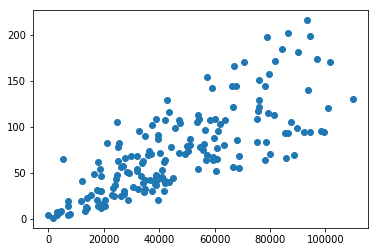

In [344]:
plt.plot(list(dict_census_data.values()), list(dict_fires_per_zip.values()), 'o', label='original data')

#### Question 7 exploration

In [345]:
data_df.CO_DETECTOR_PRESENT_DESC.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [346]:
len(data_df.CO_DETECTOR_PRESENT_DESC)

2277779

In [347]:
data_filtered_to_CO_detector = data_df[data_df['CO_DETECTOR_PRESENT_DESC'].isin(['Yes','No'])]

In [350]:
data_filtered_to_CO_detector.head()

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG,INCIDENT_TYPE_KEY,INCIDENT_HOUR
28,55672777,2332,"746 - Carbon monoxide detector activation, no CO",01/01/2013 12:20:13 AM,01/01/2013 12:25:39 AM,2.0,01/01/2013 12:41:53 AM,"1 - More than initial alarm, less than Signal 7-5",1300.0,"42 - HazMat detection, monitoring, sampling, &...",...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,746,0
153,55673169,97,736 - CO detector activation due to malfunction,01/01/2013 01:47:48 AM,01/01/2013 01:52:39 AM,2.0,01/01/2013 01:54:26 AM,"1 - More than initial alarm, less than Signal 7-5",398.0,86 - Investigate,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,736,1
194,55673290,105,"400 - Hazardous condition, other",01/01/2013 02:21:49 AM,01/01/2013 02:30:05 AM,2.0,01/01/2013 02:47:36 AM,"1 - More than initial alarm, less than Signal 7-5",1547.0,45 - Remove hazard,...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,400,2
249,55673419,3184,424 - Carbon monoxide incident,01/01/2013 03:03:40 AM,01/01/2013 03:08:28 AM,2.0,01/01/2013 03:18:44 AM,"1 - More than initial alarm, less than Signal 7-5",904.0,"42 - HazMat detection, monitoring, sampling, &...",...,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN,424,3
449,55673903,3318,424 - Carbon monoxide incident,01/01/2013 06:38:05 AM,01/01/2013 06:43:07 AM,2.0,01/01/2013 07:09:16 AM,"1 - More than initial alarm, less than Signal 7-5",1871.0,"42 - HazMat detection, monitoring, sampling, &...",...,5th,Yes,NaN,NaN,NaN,NaN,NaN,NaN,424,6


In [385]:
#Building the time intervals buckets, for CO_present/Not Present
data_CO_present = data_filtered_to_CO_detector.loc[data_filtered_to_CO_detector['CO_DETECTOR_PRESENT_DESC'] == 'Yes']
data_CO_absent = data_filtered_to_CO_detector.loc[data_filtered_to_CO_detector['CO_DETECTOR_PRESENT_DESC'] == 'No']

In [386]:
#filtering Duration of incidents and time
#Dividing to time buckets 20-30, 30-40, 40-50 ,50-60
Incidents_per_interval_CO_presnt = dict()
Incidents_per_interval_CO_absent = dict()
for x in range(65,70):
    Incidents_per_interval_CO_presnt[chr(x)] = 0
    Incidents_per_interval_CO_absent[chr(x)] = 0

    

In [387]:
mis_fits = 0
for t_seconds in data_CO_present['TOTAL_INCIDENT_DURATION'] :
    if (20 <= (t_seconds/60) <= 30):
        Incidents_per_interval_CO_presnt['A'] += 1
    elif (30 <= (t_seconds/60) <= 40):
        Incidents_per_interval_CO_presnt['B'] += 1
    elif (40 <= (t_seconds/60) <= 50):
        Incidents_per_interval_CO_presnt['C'] += 1
    elif (50 <= (t_seconds/60) <= 60):
        Incidents_per_interval_CO_presnt['D'] += 1
    elif (60 <= (t_seconds/60) <= 70):
        Incidents_per_interval_CO_presnt['E'] += 1
    else:
        mis_fits += 1

In [388]:
mis_fits_missing = 0
for t_seconds in data_CO_absent['TOTAL_INCIDENT_DURATION'] :
    if (20 <= (t_seconds/60) <= 30):
        Incidents_per_interval_CO_absent['A'] += 1
    elif (30 <= (t_seconds/60) <= 40):
        Incidents_per_interval_CO_absent['B'] += 1
    elif (40 <= (t_seconds/60) <= 50):
        Incidents_per_interval_CO_absent['C'] += 1
    elif (50 <= (t_seconds/60) <= 60):
        Incidents_per_interval_CO_absent['D'] += 1
    elif (60 <= (t_seconds/60) <= 70):
        Incidents_per_interval_CO_absent['E'] += 1
    else:
        mis_fits_missing += 1

In [389]:
Incidents_per_interval_CO_absent

{'A': 1181, 'B': 586, 'C': 348, 'D': 249, 'E': 158}

In [390]:
Incidents_per_interval_CO_presnt

{'A': 6501, 'B': 2145, 'C': 923, 'D': 481, 'E': 235}

In [395]:
Frequency_for_intervals_present = dict()
Frequency_for_intervals_absent = dict()
target_ratio_per_bucket = dict()
total_present = len(data_CO_present.TOTAL_INCIDENT_DURATION)
total_absent = len(data_CO_absent.TOTAL_INCIDENT_DURATION)
for x in range(65,70):
    Frequncy_for_intervals_present[chr(x)] = Incidents_per_interval_CO_presnt[chr(x)]/total_present
    Frequency_for_intervals_absent[chr(x)] = Incidents_per_interval_CO_absent[chr(x)]/total_absent
    target_ratio_per_bucket[chr(x)] = Frequency_for_intervals_absent[chr(x)]/Frequncy_for_intervals_present[chr(x)]

In [396]:
Frequncy_for_intervals_present

{'A': 0.270525571137281,
 'B': 0.08925970621280846,
 'C': 0.0384087220673297,
 'D': 0.020015812908326745,
 'E': 0.009779035412592068}

In [397]:
Frequency_for_intervals_absent

{'A': 0.2092487597448618,
 'B': 0.10382707299787385,
 'C': 0.06165839829907867,
 'D': 0.04411764705882353,
 'E': 0.02799433026222537}

In [398]:
target_ratio_per_bucket

{'A': 0.7734897624102098,
 'B': 1.163202047185038,
 'C': 1.6053228272211912,
 'D': 2.204139660022013,
 'E': 2.862688300134204}

In [399]:
mid_bins = []
for duration in range(25, 75, 10):
    mid_bins.append(duration)

In [400]:
mid_bins

[25, 35, 45, 55, 65]

In [402]:
y_vals = list(target_ratio_per_bucket.values())

In [403]:
y_vals

[0.7734897624102098,
 1.163202047185038,
 1.6053228272211912,
 2.204139660022013,
 2.862688300134204]

In [405]:
def predict(x, y, val):
    """ Return predition where x and y are array-like, val is querry value"""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return intercept + (slope* val)

In [408]:
predict(mid_bins, y_vals, 55)

2.2437019882230276

In [409]:
res7 = predict(mid_bins, y_vals, 39)
np.round(res7, 10)

1.4086084381